[3.75621761e-05 2.88615874e-04]


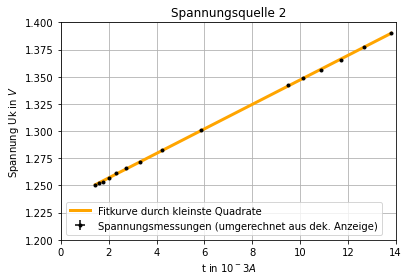

0.0113*x + 1.2345

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from sympy import *

file1 = open("E2a_data.csv", encoding="charmap")
beamData1 = np.loadtxt(file1, delimiter=",")

U2 = 1.5323
dU2 = 0.0012
db = 0.5

s = beamData1[:,0].size
x_dataPos1 = beamData1[:,1]
y_dataPos1 = []
for i in range(0,s):
    y_dataPos1.append(round(((beamData1[i,2])/1000)*U2,4))
    
xerr = [0.01 for i in range(0,s)]
yerr = []
for i in range(0,s):
    yerr.append(round((((y_dataPos1[i])/1000)*dU2)+(U2*(db/1000)),4))

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A, B):
    return A * np.asarray(x) + B

pFit, pCov = curve_fit(fitCurve, x_dataPos1, y_dataPos1, p0=[-1,4])
plt.plot(x_dataPos1, fitCurve(x_dataPos1, *pFit), label="Fitkurve durch kleinste Quadrate", color="Orange",linewidth=3)
perr = np.sqrt(np.diag(pCov))
print(perr)

plt.errorbar(x_dataPos1,y_dataPos1,yerr,xerr,fmt='o',markersize=3,label="Spannungsmessungen (umgerechnet aus dek. Anzeige)",color="Black")
plt.xlabel("t in $10^-3A$")
plt.ylabel("Spannung Uk in $V$")
plt.title("Spannungsquelle 2")
plt.axis([0,14, 1.2, 1.4])
plt.legend()
plt.grid(True)
plt.show()

x = Symbol('x')
A = pFit[0].round(4)
B = pFit[1].round(4)
fitCurve1 = A * x + B
fitCurve1